# Manipulacion de Datos de Strings con Python

## Resumen

En este cuaderno, trabajaremos con datos de rayos de 2016 a 2018 de la Administración Nacional Oceánica y Atmosférica (NOAA, por sus siglas en inglés) para calcular las sumas semanales de rayos y representarlos en un gráfico de barras. Luego, calcularemos los totales trimestrales de rayos y los representaremos en gráficos de barras.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('eda_manipulate_date_strings_with_python.csv')
df.head()

,date,number_of_strikes,center_point_geom
0,2016-08-05,16,POINT(-101.5 24.7)
1,2016-08-05,16,POINT(-85 34.3)
2,2016-08-05,16,POINT(-89 41.4)
3,2016-08-05,16,POINT(-89.8 30.7)
4,2016-08-05,16,POINT(-86.2 37.9)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479003 entries, 0 to 10479002
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 239.8+ MB


## Creae una nueva columna fecha

Al igual que con conjuntos de datos similares con los que has trabajado, el tipo de datos de la columna  `date`  es un objeto de cadena, lo cual limita lo que puedes hacer con los datos en esta columna. Convertir la columna a datetime te permitirá trabajar con estos datos de manera mucho más fácil.  

In [4]:
# Convert the `date` column to datetime.
df['fecha'] = pd.to_datetime(df['date'])

A continuación, crearemos cuatro nuevas columnas:  `week` ,  `month` ,  `quarter`  y  `year` . Podemos hacer esto utilizando el método  `datetime.strftime()`  del objeto datetime.  `strftime`  es una abreviatura de "string format time". Utilizaremos este método en los datos datetime de la columna  `week`  y extraerá la información que especifiquemos, formateada como una cadena.

Para especificar la información a extraer, utilizaremos códigos de formato strftime. Puedes encontrar una lista completa de los códigos disponibles para usar en la [documentación de códigos de formato strftime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior). En este caso, utilizaremos  `%Y`  para el año,  `%V`  para el número de semana,  `%q`  para el trimestre.

**NOTA:** El siguiente proceso podría tardar uno o dos minutos en completarse.

In [5]:
# Create four new columns.
df['semana']        = df.fecha.dt.strftime('%Y-W%V')
df['mes']           = df.fecha.dt.strftime('%Y-%m')
df['cuatrimestre']  = df.fecha.dt.to_period('Q').dt.strftime('%Y-Q%q')
df['año']           = df.fecha.dt.strftime('%Y')


In [6]:
df.head(10)

,date,number_of_strikes,center_point_geom,fecha,semana,mes,cuatrimestre,año
0,2016-08-05,16,POINT(-101.5 24.7),2016-08-05,2016-W31,2016-08,2016-Q3,2016
1,2016-08-05,16,POINT(-85 34.3),2016-08-05,2016-W31,2016-08,2016-Q3,2016
2,2016-08-05,16,POINT(-89 41.4),2016-08-05,2016-W31,2016-08,2016-Q3,2016
3,2016-08-05,16,POINT(-89.8 30.7),2016-08-05,2016-W31,2016-08,2016-Q3,2016
4,2016-08-05,16,POINT(-86.2 37.9),2016-08-05,2016-W31,2016-08,2016-Q3,2016
5,2016-08-05,16,POINT(-97.8 38.9),2016-08-05,2016-W31,2016-08,2016-Q3,2016
6,2016-08-05,16,POINT(-81.9 36),2016-08-05,2016-W31,2016-08,2016-Q3,2016
7,2016-08-05,16,POINT(-90.9 36.7),2016-08-05,2016-W31,2016-08,2016-Q3,2016
8,2016-08-05,16,POINT(-106.6 26.1),2016-08-05,2016-W31,2016-08,2016-Q3,2016
9,2016-08-05,16,POINT(-108 31.6),2016-08-05,2016-W31,2016-08,2016-Q3,2016


## Gráfica el número de rayos semanales en 2018.

A continuación, vamos a trazar el número de rayos semanales. Comencemos filtrando el conjunto de datos original para el año 2018. Utilizaremos las funciones  `groupby()`  y  `sum()`  para obtener el número de rayos por semana.

In [9]:
# Create a new dataframe view of just 2018 data, summed by week.
df_por_semana_2018 = df[df['año'] == '2018'].groupby(['semana']).sum(numeric_only=True).reset_index()
df_por_semana_2018.head()

,semana,number_of_strikes
0,2018-W01,34843
1,2018-W02,353425
2,2018-W03,37132
3,2018-W04,412772
4,2018-W05,34972


Ahora tenemos una tabla con exactamente lo que necesitamos para graficar el total de rayos semanales en 2018. Utilizaremos la función  `plt.bar()`  para trazar el gráfico de barras. Dentro del campo de argumentos, ingresaremos el eje x (la columna  `week` ), luego ingresaremos el eje y (o altura) como la columna  `number_of_strikes` .

Utilizaremos  `plt.xlabel()` ,  `plt.ylabel()`  y  `plt.title()`  para agregar texto apropiado al gráfico.

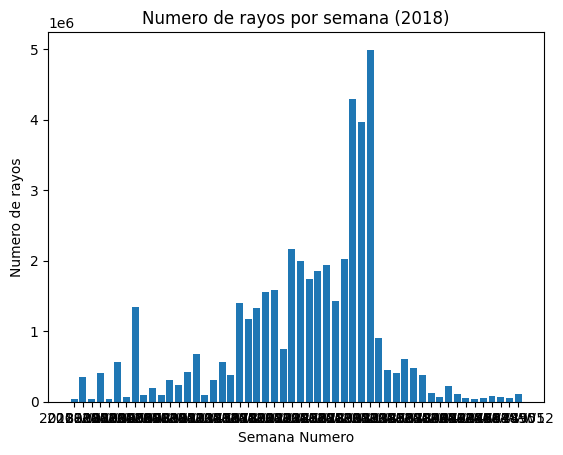

In [10]:
# Plot a bar graph of weekly strike totals in 2018.
plt.bar(x = df_por_semana_2018['semana'], height = df_por_semana_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Semana Numero")
plt.ylabel("Numero de rayos")
plt.title("Numero de rayos por semana (2018)");

### Adjustar el tamaño deñ grafico

Ahora tenemos un gráfico, pero no podemos leer las etiquetas del eje x. Para solucionar este problema, primero lo haremos más grande utilizando  `plt.figure(figsize=(20, 5))` . Esto cambiará el tamaño a 20 pulgadas de ancho por 5 pulgadas de alto.

A continuación, utilizaremos la función  `plt.xticks()`  para acceder a las etiquetas de las marcas en el eje x. Utilizando los argumentos de palabras clave  `rotation`  y  `fontsize` , rota las etiquetas y reduce el tamaño de la fuente.

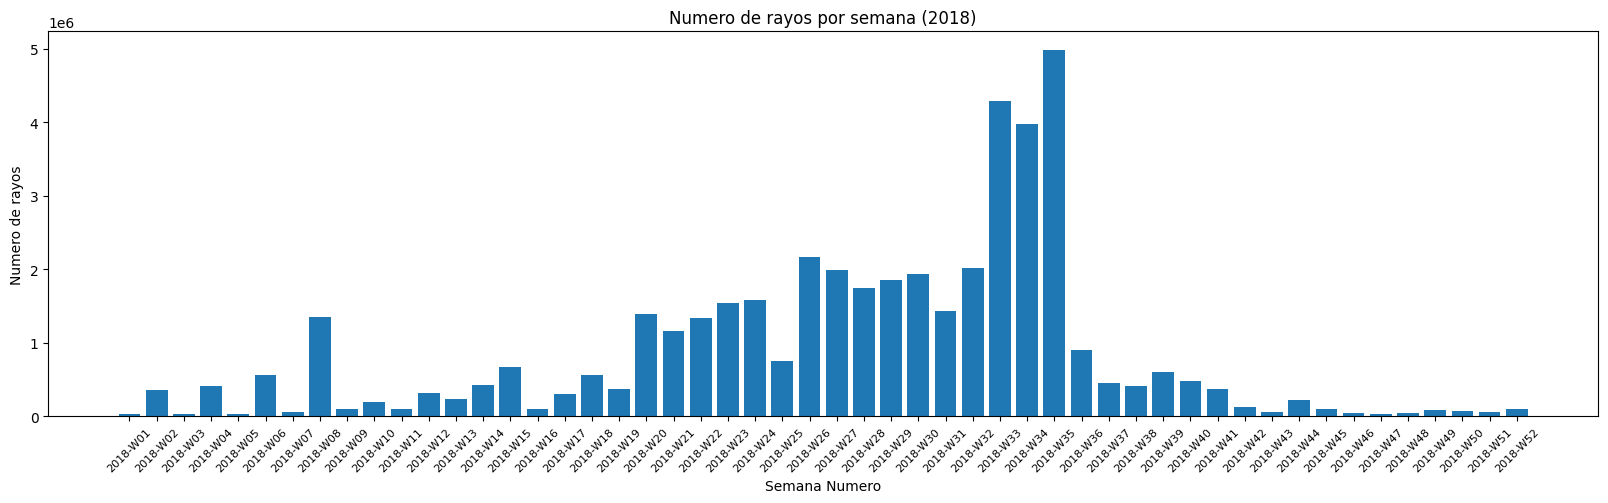

In [11]:
plt.figure(figsize = (20, 5)) # Increase output size.
plt.bar(x = df_por_semana_2018['semana'], height = df_por_semana_2018['number_of_strikes'])
plt.plot()
plt.xlabel("Semana Numero")
plt.ylabel("Numero de rayos")
plt.title("Numero de rayos por semana (2018)");
plt.xticks(rotation = 45, fontsize = 8) # Rotate x-axis labels and decrease font size.

plt.show()

## Gráfica el número de rayos trimestrales de 2016 a 2018.

A continuación, vamos a graficar los rayos por trimestre para el rango completo de fechas de los datos disponibles. Para una visualización, será más fácil trabajar con números en millones, como por ejemplo 25,2 millones. Como ejemplo, el siguiente código dividirá la columna  `number_of_strikes`  entre un millón.

In [12]:
df_by_quarter = df['number_of_strikes'].div(1000000)
df_by_quarter.head()

0    0.000016
1    0.000016
2    0.000016
3    0.000016
4    0.000016
Name: number_of_strikes, dtype: float64

### Formatear los números

Esto por sí solo no ayuda mucho, ya que solo movió el decimal hacia la izquierda. También tendremos que formatear los números. Comencemos agrupando los datos por trimestre y sumándolos.

Luego, crearemos una columna  `number_of_strikes_formatted`  en el dataframe resultante dividiendo entre un millón, redondeando a un dígito después del punto decimal, convirtiéndolo en una cadena de texto y agregando "M" al final para representar millones.

In [21]:
df_por_cuatimestre = df.groupby(['cuatrimestre']).sum(numeric_only=True).reset_index()


df_por_cuatimestre['number_of_strikes_formatted'] = df_por_cuastimestre['number_of_strikes']\
                                                    .div(1000000).round(1).astype(str) + 'M'

df_por_cuatimestre.head()

,cuatrimestre,number_of_strikes,number_of_strikes_formatted
0,2016-Q1,2683798,2.7M
1,2016-Q2,15084857,15.1M
2,2016-Q3,21843820,21.8M
3,2016-Q4,1969754,2.0M
4,2017-Q1,2444279,2.4M


### Agregar Etiquetas

Antes de comenzar a trazar, escribamos una función que nos ayudará a etiquetar cada barra en el gráfico con su correspondiente texto de  `number_of_strikes_formatted` . La función utiliza  `plt.text()` , que es una función de pyplot cuyos argumentos posicionales son  `x` ,  `y`  y  `s` .  `x`  representa las coordenadas del eje x,  `y`  representa las coordenadas del eje y y  `s`  representa el texto que queremos que aparezca en estas coordenadas.

**Referencia:** [documentación de pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html).

In [22]:
def agrega_etiquetas(x, y, labels):
    '''
    Itera sobre los datos y coloca etiquetas de texto encima de cada barra del gráfico de barras.
    '''
    for i in range(len(x)):
        plt.text(i, y[i], labels[i], ha='center', va='bottom')


### Plot the bar graph

Next, let's plot the bar graph. 

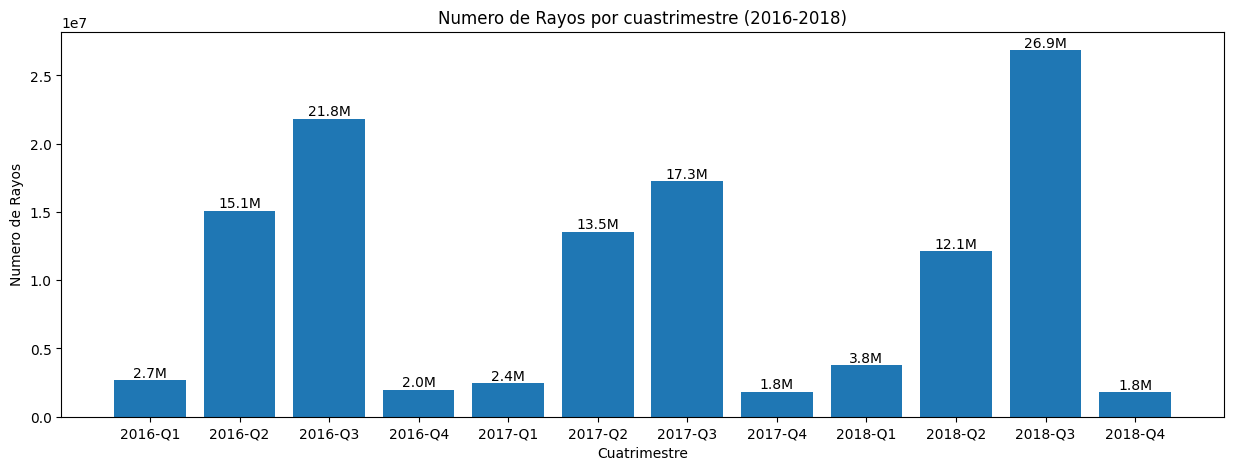

In [23]:
plt.figure(figsize = (15, 5))
plt.bar(x = df_por_cuastimestre.cuatrimestre, height = df_por_cuastimestre['number_of_strikes'])
agrega_etiquetas(df_por_cuastimestre['cuatrimestre'], 
                 df_por_cuastimestre['number_of_strikes'], 
                 df_por_cuastimestre['number_of_strikes_formatted'])
plt.plot()
plt.xlabel('Cuatrimestre')
plt.ylabel('Numero de Rayos')
plt.title('Numero de Rayos por cuastrimestre (2016-2018)')
plt.show()

### Crear un grafico de barras agrupadas

Ahora, crearemos un gráfico de barras agrupadas para comparar mejor los cambios interanuales en cada trimestre. Podemos hacer esto creando dos nuevas columnas que desglosen el trimestre y el año a partir de la columna  `quarter` . Utilizaremos la columna  `quarter`  y tomaremos los últimos dos caracteres para obtener  `quarter_number` , y tomaremos los primeros cuatro caracteres para obtener  `year` .

In [25]:
# Create two new columns.
df_por_cuatimestre['numero_cuatrimestre'] = df_por_cuatimestre.cuatrimestre.str[-2:]
df_por_cuatimestre['año'] = df_por_cuatimestre['cuatrimestre'].str[:4]
df_por_cuatimestre.head()

,cuatrimestre,number_of_strikes,number_of_strikes_formatted,numero_cuatrimestre,year,año
0,2016-Q1,2683798,2.7M,Q1,2016,2016
1,2016-Q2,15084857,15.1M,Q2,2016,2016
2,2016-Q3,21843820,21.8M,Q3,2016,2016
3,2016-Q4,1969754,2.0M,Q4,2016,2016
4,2017-Q1,2444279,2.4M,Q1,2017,2017


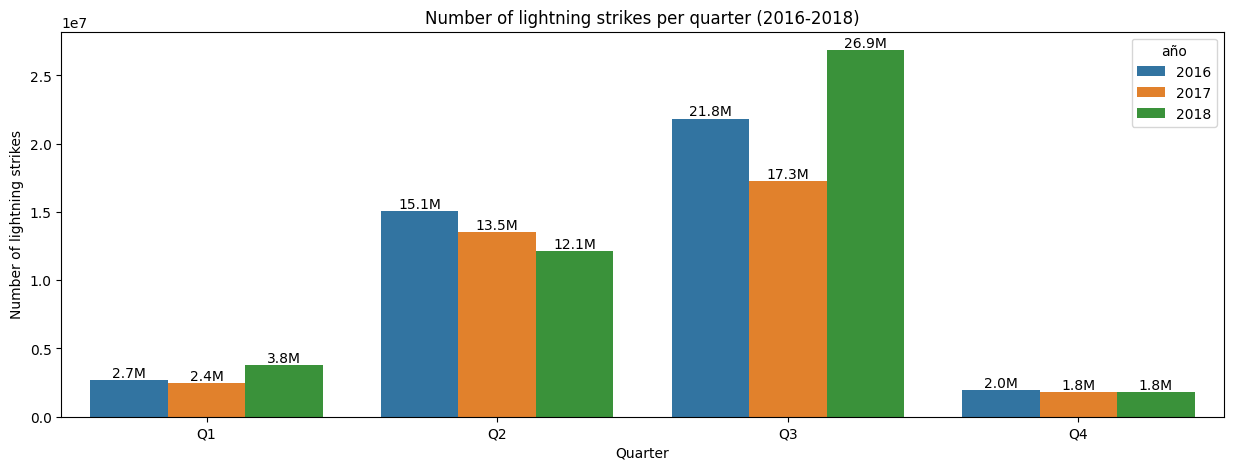

In [26]:
plt.figure(figsize = (15, 5))
p = sns.barplot(
    data = df_por_cuatimestre,
    x = 'numero_cuatrimestre',
    y = 'number_of_strikes',
    hue = "año")
for b in p.patches:
    p.annotate(str(round(b.get_height()/1000000, 1))+'M', 
                   (b.get_x() + b.get_width() / 2., b.get_height() + 1.2e6), 
                   ha = 'center', va = 'bottom', 
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Quarter")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes per quarter (2016-2018)")
plt.show()